# Outlier and influential observation sensitive analysis

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pickle

import util

## Loading data

In [2]:
df_variables = pd.read_csv('data/output/df_without_collinearity_standardized.csv', index_col=0)

In [3]:
df_political = pd.read_csv('data/util/df_political_without_missing_points.csv', index_col=0)[['percentual_votes_for_bolsonaro']]

In [4]:
df_vaccination_fully_vaccinated_people = pd.read_csv('data/util/df_vaccination.csv', index_col=0)[['% people fully vaccinated (1/2020)', '% people fully vaccinated (2020)', '% people fully vaccinated (2020-2021)', '% people fully vaccinated (2020-2022)']]

In [5]:
df_y = pd.read_csv('data/util/df_mortality.csv', index_col=0)

In [6]:
list_population =  df_y['population']
list_offset = np.log(list_population)

In [7]:
df_cluster_probabilities = pd.read_csv('data/df_standardized_pca_2spherical_5_probability.csv', index_col=0)
df_cluster_probabilities.columns = ['Semi-urbanized', 'Urbanized', 'Rural with high human development', 'Urbanized with informal settlements', 'Rural with low human development']

## Outlier and influential observation sensitivity Analysis


*** Period:  2020_1
\*** Model 9
===>Full model:
                           Generalized Linear Model Regression Results                            
Dep. Variable:     deaths_accumulated_first_semester_2020   No. Observations:                 5560
Model:                                                GLM   Df Residuals:                     5555
Model Family:                            NegativeBinomial   Df Model:                            4
Link Function:                                        Log   Scale:                          1.0000
Method:                                              IRLS   Log-Likelihood:                -8535.4
Date:                                    Thu, 02 Jan 2025   Deviance:                       3482.4
Time:                                            22:44:50   Pearson chi2:                 5.38e+03
No. Iterations:                                        13   Pseudo R-squ. (CS):            0.08756
Covariance Type:                                nonrobust  

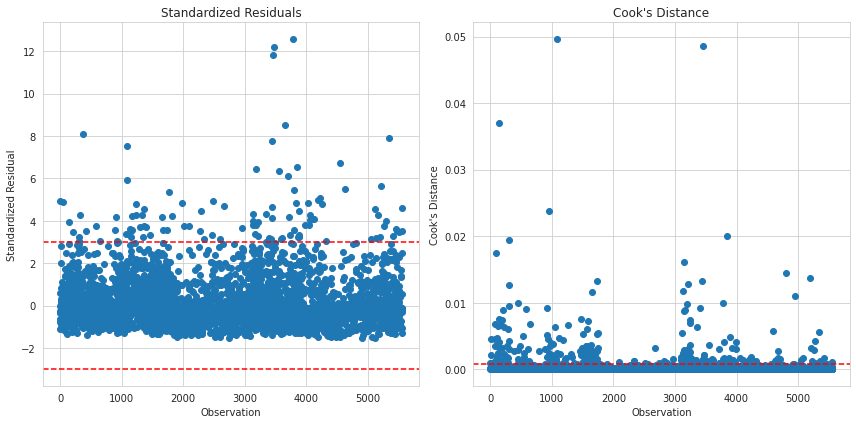

Quantity outliers (Standardized Residuals > 3): 109
Quantity influential Points (Cook's Distance > 4/n): 293
Selected alpha: 0.28
                           Generalized Linear Model Regression Results                            
Dep. Variable:     deaths_accumulated_first_semester_2020   No. Observations:                 5212
Model:                                                GLM   Df Residuals:                     5207
Model Family:                            NegativeBinomial   Df Model:                            4
Link Function:                                        Log   Scale:                          1.0000
Method:                                              IRLS   Log-Likelihood:                -6858.2
Date:                                    Thu, 02 Jan 2025   Deviance:                       2758.7
Time:                                            22:45:10   Pearson chi2:                 3.00e+03
No. Iterations:                                        11   Pseudo R-squ. (CS)

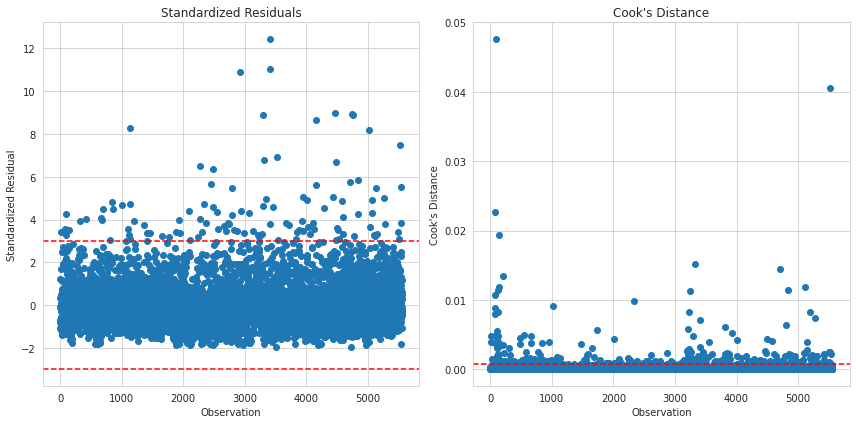

Quantity outliers (Standardized Residuals > 3): 115
Quantity influential Points (Cook's Distance > 4/n): 320
Selected alpha: 0.11
                    Generalized Linear Model Regression Results                    
Dep. Variable:     deaths_accumulated_2020   No. Observations:                 5189
Model:                                 GLM   Df Residuals:                     5184
Model Family:             NegativeBinomial   Df Model:                            4
Link Function:                         Log   Scale:                          1.0000
Method:                               IRLS   Log-Likelihood:                -13686.
Date:                     Thu, 02 Jan 2025   Deviance:                       4743.7
Time:                             22:45:27   Pearson chi2:                 4.86e+03
No. Iterations:                         10   Pseudo R-squ. (CS):            0.04299
Covariance Type:                 nonrobust                                         
                              

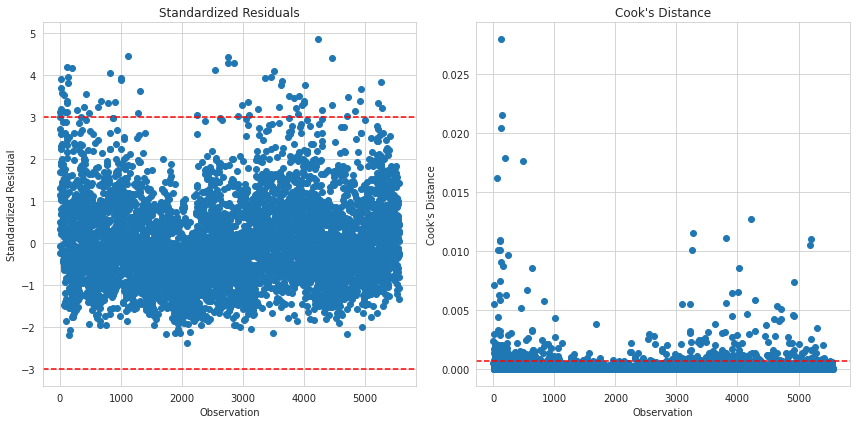

Quantity outliers (Standardized Residuals > 3): 67
Quantity influential Points (Cook's Distance > 4/n): 337
Selected alpha: 0.08
                 Generalized Linear Model Regression Results                  
Dep. Variable:            deaths_2021   No. Observations:                 5223
Model:                            GLM   Df Residuals:                     5218
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17663.
Date:                Thu, 02 Jan 2025   Deviance:                       5080.4
Time:                        22:45:38   Pearson chi2:                 4.86e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5855
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|  

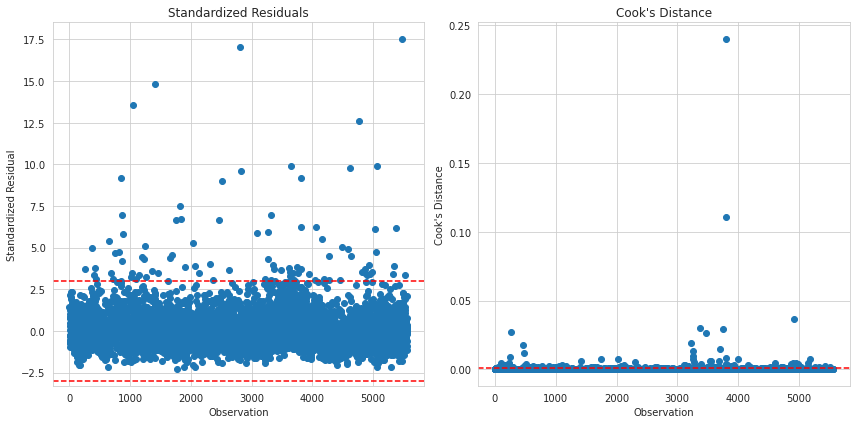

Quantity outliers (Standardized Residuals > 3): 93
Quantity influential Points (Cook's Distance > 4/n): 265
Selected alpha: 0.05
                 Generalized Linear Model Regression Results                  
Dep. Variable:            deaths_2022   No. Observations:                 5237
Model:                            GLM   Df Residuals:                     5232
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -10011.
Date:                Thu, 02 Jan 2025   Deviance:                       3966.0
Time:                        22:45:52   Pearson chi2:                 4.15e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3038
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|  

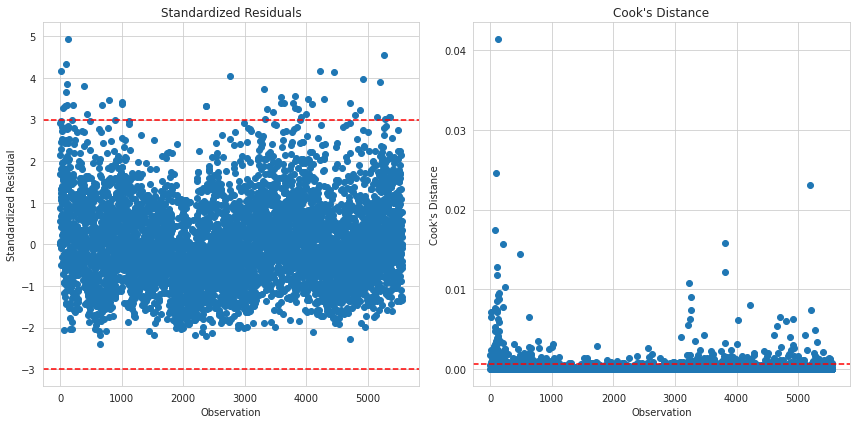

Quantity outliers (Standardized Residuals > 3): 46
Quantity influential Points (Cook's Distance > 4/n): 336
Selected alpha: 0.060000000000000005
                 Generalized Linear Model Regression Results                  
Dep. Variable:                 deaths   No. Observations:                 5223
Model:                            GLM   Df Residuals:                     5218
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19430.
Date:                Thu, 02 Jan 2025   Deviance:                       5401.9
Time:                        22:46:04   Pearson chi2:                 5.16e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5541
Covariance Type:            nonrobust                                         
                                          coef    std err        

In [8]:
list_columns_y = ['deaths_accumulated_first_semester_2020', 'deaths_accumulated_2020', 'deaths_2021', 'deaths_2022', 'deaths']
list_periods = ['2020_1','2020', '2021', '2022', '2020_2022']
list_delta_first_death_columns = ['delta_first_death_2020-06-30', 'delta_first_death_2020-12-31', 'delta_first_death_2021-12-31', 'delta_first_death_2022-12-31', 'delta_first_death_general_period']

vaccination_columns = [0,1,2,3,3]

for i in range(len(list_periods)):
    column_y = list_columns_y[i]
    period = list_periods[i]
    column_delta_first_death = list_delta_first_death_columns[i]
    list_offset_extra = np.log(df_y[column_delta_first_death]+1)
    print('\n*** Period: ', period)
        
    y = df_y[column_y]

    # Model 9
    print('\*** Model 9')
    print('===>Full model:')
    with open('models/model_9_'+period+'.pkl', 'rb') as file:
        model = pickle.load(file)
    util.summarize_results(model)
    outliers, influential_points, cooks_d, standardized_residuals = outlier_analysis(model)

    x = df_cluster_probabilities.drop(columns=['Urbanized']).copy()
    x = sm.add_constant(x)

    positions_to_remove = list(set(np.concatenate([outliers, influential_points])))
    indices_to_remove = x.iloc[positions_to_remove].index
    x_without_outliers = x.drop(indices_to_remove)
    y_without_outliers = y.drop(indices_to_remove)
    list_offset_without_outliers = list_offset.drop(indices_to_remove)
    list_offset_extra_without_outliers = list_offset_extra.drop(indices_to_remove)

    model = util.tunning_negative_binomial_model(x_without_outliers,y_without_outliers,list_offset_without_outliers, list_offset_extra_without_outliers)
    filename = 'model_9_'+period
    util.save_model(model,filename,'models/sensitivity_analysis/outliers')
    util.summarize_results(model)

    # Model 10
    # print('\*** Model 10')
    # print('===>Full model:')
    # with open('models/model_10_'+period+'.pkl', 'rb') as file:
    #     model = pickle.load(file)
    # summarize_results(model)
    # outliers, influential_points, cooks_d, standardized_residuals = outlier_analysis(model)
    #
    # x = df_variables.copy()
    # scaler = StandardScaler()
    # percentage_votes_for_bolsonaro_standardized = scaler.fit_transform(df_political)
    # x['percentage_votes_for_bolsonaro'] = percentage_votes_for_bolsonaro_standardized[:,0]
    # vaccination_column = vaccination_columns[i]
    # vaccination_standardized = scaler.fit_transform(df_vaccination_fully_vaccinated_people)
    # x['% people fully vaccinated'] = vaccination_standardized[:, vaccination_column]
    # x = sm.add_constant(x)
    #
    # positions_to_remove = list(set(np.concatenate([outliers, influential_points])))
    # indices_to_remove = x.iloc[positions_to_remove].index
    # x_without_outliers = x.drop(indices_to_remove)
    # y_without_outliers = y.drop(indices_to_remove)
    # list_offset_without_outliers = list_offset.drop(indices_to_remove)
    # list_offset_extra_without_outliers = list_offset_extra.drop(indices_to_remove)
    #
    # model = tunning_negative_binomial_model(x_without_outliers,y_without_outliers,list_offset_without_outliers, list_offset_extra_without_outliers)
    # filename = 'model_10_'+period
    # save_model(model,filename,'models/sensitivity_analysis/outliers')
    # summarize_results(model)